<small><i>This notebook was put together by [Jake Vanderplas](http://www.vanderplas.com) for PyCon 2014. Source and license info is on [GitHub](https://github.com/jakevdp/sklearn_pycon2014/).</i></small>

# Basic principles of machine learning

Here is where we start diving into the field of machine learning.

By the end of this section you will

- Know the basic categories of supervised learning, including classification and regression problems.
- Know the basic categories of unsupervised learning, including dimensionality reduction and clustering.
- Know the basic syntax of the Scikit-learn **estimator** interface.
- Know why data should be split into a **training set** and **test set**

In addition, we will go over several basic tools within scikit-learn which can be used to accomplish the above tasks.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Problem setting

### A simple definition of machine learning

Machine Learning (ML) is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

In most ML applications, the data is in a 2D array of shape ``[n_samples x n_features]``,
where the number of features is the same for each object, and each feature column refers
to a related piece of information about each sample.

Machine learning can be broken into two broad regimes:
*supervised learning* and *unsupervised learning*.
We’ll introduce these concepts here, and discuss them in more detail below.

### Introducing the scikit-learn estimator object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is:

In [2]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated:

In [3]:
model = LinearRegression(normalize=True)
print model.normalize

True


In [4]:
print model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


**Estimated parameters**: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [7]:
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

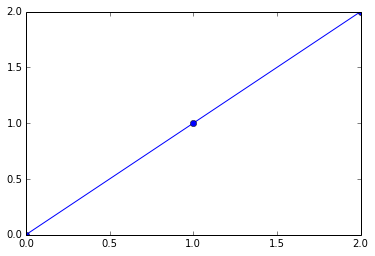

In [8]:
plt.plot(x, y, marker='o');

In [9]:
X = x[:, np.newaxis] # The input data for sklearn is 2D: (samples == 3 x features == 1)
X

array([[0],
       [1],
       [2]])

In [10]:
model.fit(X, y) 
model.coef_

array([ 1.])

## Supervised Learning: Classification and regression

In **Supervised Learning**, we have a dataset consisting of both features and labels.
The task is to construct an estimator which is able to predict the label of an object
given the set of features. A relatively simple example is predicting the species of 
iris given a set of measurements of its flower. This is a relatively simple task. 
Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

### Classification
K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

In [23]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print iris.target_names[knn.predict([[3, 5, 4, 2]])]

['virginica']


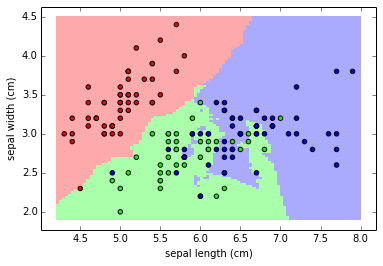

In [24]:
# A plot of the sepal space and the prediction of the KNN
from fig_code import plot_iris_classification
plot_iris_classification(neighbors.KNeighborsClassifier, n_neighbors=5)

#### Quick Exercise
Now use as an estimator on the same problem: ``sklearn.svm.SVC``.

(Note that you don't have to know what it is to use it. If you finish early, do the same plot as above).

In [46]:
from sklearn.svm import SVC
unknown_iris = [[3, 5, 4, 2]]

# Use SVC to train and predict the species of the unknown iris...
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X,y)
#print svc_model.coef_
print iris.target_names[svc_model.predict(unknown_iris)]
print svc_model.predict_proba(unknown_iris)



['versicolor']
[[ 0.1046199  0.8290461  0.066334 ]]


### Regression
The simplest possible regression setting is the linear regression one:

In [31]:
# Create some simple data
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.normal(size=20)

In [32]:
# Fit a linear regression to it
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print "Model coefficient: %.5f, and intercept: %.5f" % (model.coef_, model.intercept_)

Model coefficient: 3.93491, and intercept: 1.46229


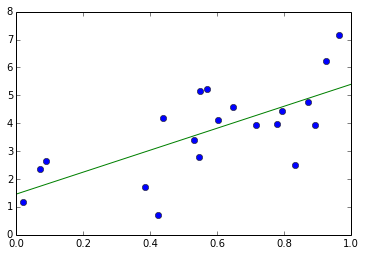

In [33]:
# Plot the data and the model prediction
X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_test = model.predict(X_test)
import pylab as pl
plt.plot(X.squeeze(), y, 'o')
plt.plot(X_test.squeeze(), y_test);

## Unsupervised Learning

**Unsupervised Learning** addresses a different sort of problem. Here the data has no labels,
and we are interested in finding similarities between the objects in question. In a sense,
you can think of unsupervised learning as a means of discovering labels from the data itself.
Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*density estimation*. For example, in the iris data discussed above, we can used unsupervised
methods to determine combinations of the measurements which best display the structure of the
data. As we’ll see below, such a projection of the data can be used to visualize the
four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:

- given detailed observations of distant galaxies, determine which features or combinations of
  features summarize best the information.
- given a mixture of two sound sources (for example, a person talking over some music),
  separate the two (this is called the [blind source separation](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
- given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.

Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful
features in heterogeneous data, and then these features can be used within a supervised
framework.

### Dimensionality Reduction

Principle Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance. Here we'll show an example of using PCA for visualization.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

In [35]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print X.shape
print "Reduced dataset shape:", X_reduced.shape

(150, 4)
Reduced dataset shape: (150, 2)


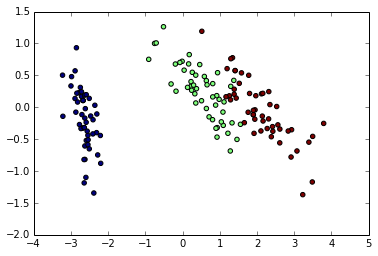

In [36]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y);

In [37]:
print "Meaning of the 2 components:"
for component in pca.components_:
    print " + ".join("%.2f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names))

Meaning of the 2 components:
0.36 x sepal length (cm) + -0.08 x sepal width (cm) + 0.86 x petal length (cm) + 0.36 x petal width (cm)
-0.66 x sepal length (cm) + -0.73 x sepal width (cm) + 0.18 x petal length (cm) + 0.07 x petal width (cm)


### Clustering

Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.

Note that these clusters will uncover relevent hidden structure of the data only if the criterion used highlights it.

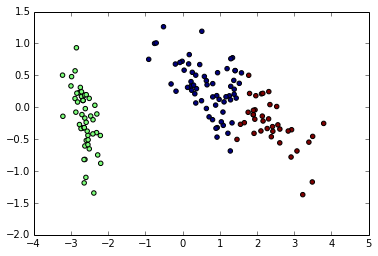

In [39]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred);

## A recap on Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we’ll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

### Measuring Performance

An important piece of machine learning is **model validation**: that is, determining how well your model will generalize from the training data to future unlabeled data. Let's look at an example using the *nearest neighbor classifier*. This is a very simple classifier: it simply stores all training data, and for any unknown quantity, simply returns the label of the closest training point.

With the iris data, it very easily returns the correct prediction for each of the input points:

In [19]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.all(y == y_pred))

True


A more useful way to look at the results is to view the **confusion matrix**, or the matrix showing the frequency of inputs and outputs:

In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


For each class, all 50 training samples are correctly identified. But this **does not mean that our model is perfect!** In particular, such a model generalizes extremely poorly to new data. We can simulate this by splitting our data into a *training set* and a *testing set*. Scikit-learn contains some convenient routines to do this:

In [21]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[12  0  0]
 [ 0 11  3]
 [ 0  0 12]]


This paints a better picture of the true performance of our classifier: apparently there is some confusion between the second and third species, which we might anticipate given what we've seen of the data above.

This is why it's **extremely important** to use a train/test split when evaluating your models.  We'll go into more depth on model evaluation later in this tutorial.

## Exercise: Interactive Demo on linearly separable data

To get a feel for how a classification task works, please run the **svm_gui.py** file available in the repository (use the command below). It will open an interactive window which allows you to click and add points and see how this affects the model.

What is the fewest number of points you can create that are not linearly separable (that is, for which a linear kernel fails to build a correct discriminative model)?

In [48]:
#%run fig_code/svm_gui.py
#    or, if this doesn't work, try
!python fig_code/svm_gui.py


Libsvm GUI

A simple graphical frontend for Libsvm mainly intended for didactic
purposes. You can create data points by point and click and visualize
the decision region induced by different kernels and parameter settings.

To create positive examples click the left mouse button; to create
negative examples click the right button.

If all examples are from the same class, it uses a one-class SVM.


fit the model
Accuracy: 69.5652173913
fit the model
Accuracy: 70.8333333333
fit the model
Accuracy: 72.0
fit the model
Accuracy: 69.2307692308
fit the model
Accuracy: 66.6666666667
fit the model
Accuracy: 64.2857142857
fit the model
Accuracy: 62.0689655172
fit the model
Accuracy: 60.0
fit the model
Accuracy: 58.064516129
fit the model
Accuracy: 56.25
fit the model
Accuracy: 63.6363636364
fit the model
Accuracy: 64.7058823529
fit the model
Accuracy: 60.0
fit the model
Accuracy: 58.3333333333
fit the model
Accuracy: 67.5675675676
fit the model
Accuracy: 65.7894736842
fit the model
Accuracy: 6

## Flow chart: how do I choose what to do with my data set?

This is a flow chart created by scikit-learn super-contributor [Andreas Mueller](https://github.com/amueller) which gives a nice summary of which algorithms to choose in various situations. Keep it around as a handy reference!

<a href="http://scikit-learn.org/dev/tutorial/machine_learning_map/index.html"><img src="http://scikit-learn.org/dev/_static/ml_map.png" width=100%></a>

Original source on the [scikit-learn website](http://scikit-learn.org/stable/tutorial/machine_learning_map/)